# Simple Linear Regrssion

## Objectives
 * Using Scikit-learn to implement simple Linear Regression
 * Create a model
 * Train the model
 * Test the model
 * Use the model

In [141]:
# Importing the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Understanding the Data
`FuelConsumption.csv`:
FuelComsumption dataset, `FuelConsumption.csv`, contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty 
vehicles for retail sale in canada. https://raw.githubusercontent.com/chandanverma07/DataSets/master/FuelConsumptionCo2.csv

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [142]:
# load the data 
df = pd.read_csv("./data/FuelConsumptionCo2.csv")                 
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [143]:
# summary of the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [144]:
#selecting and visualising some features of the dataset

# store the selected features into a new dataframe
some_features = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
some_features.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


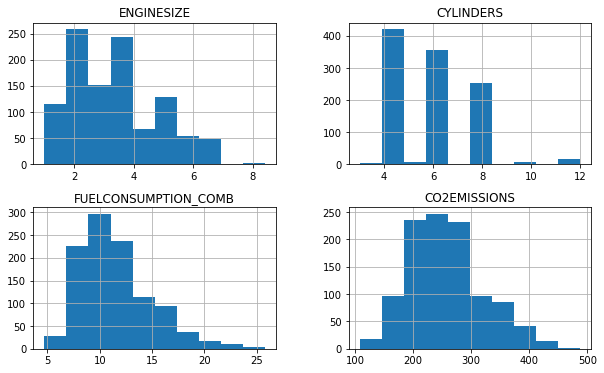

In [145]:
# Visualise the selected on a histogram
some_features.hist(figsize = (10, 6));

Visualise the linearity of the selected features against the emission


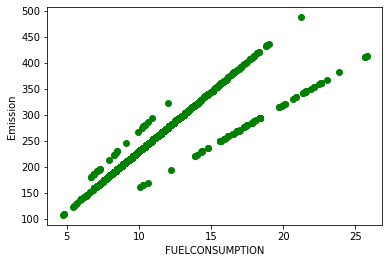

In [146]:
# scatter of FUELCONSUMPTION_COMB and CO2EMISSIONS
plt.scatter(some_features["FUELCONSUMPTION_COMB"], some_features["CO2EMISSIONS"], c = "green")
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("Emission");

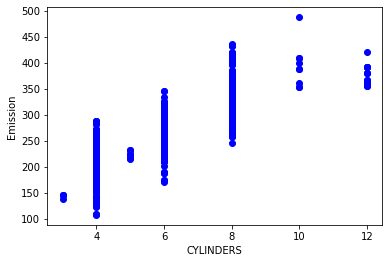

In [147]:
# scatter of CYLINDERS and CO2EMISSIONS
plt.scatter(some_features["CYLINDERS"], some_features["CO2EMISSIONS"], c = "blue")
plt.xlabel("CYLINDERS")
plt.ylabel("Emission");

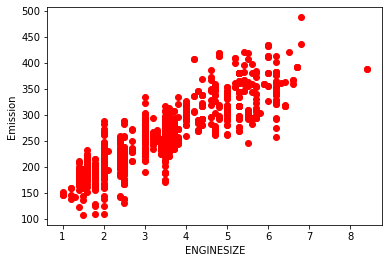

In [148]:
# scatter of ENGINESIZE and CO2EMISSIONS
plt.scatter(some_features["ENGINESIZE"], some_features["CO2EMISSIONS"], c = "red")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission");

## Creating train and test dataset.
* 80% for the train set
* 20% for the test set

In [149]:
smp = np.random.rand(len(df))<0.8
train = some_features[smp]
test = some_features[~smp]

# Simple Linear Regression
* Estimates the relationship between a dependent variable and an independent variable
* This is done by fitting a line to the observered data
* The line is fitted to obtain coefficients that minimize the error squared values between predicted and actual values.

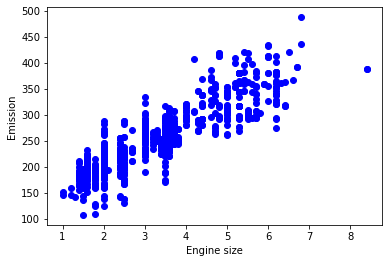

In [150]:
# Visualise the train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c = "blue")
plt.xlabel("Engine size")
plt.ylabel("Emission");

## Modeling
* Training the data using linear regression Algorithm form Scikit-learn packages

In [151]:
from sklearn.linear_model import LinearRegression

# create an instances of the Linear_regression class
lgr = LinearRegression()

#converting the selected columns to ndarray
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

#training the model
lgr.fit(train_x, train_y)

# printing out the coefficient  and Intercept of the regression model
print("coefficients: " ,lgr.coef_)
print("Intercept: ", lgr.intercept_)



coefficients:  [[39.32740276]]
Intercept:  [124.88529838]


### Plot the regression line
* Using the coefficient and the intercept obtained from model
* The regression line can be plotted

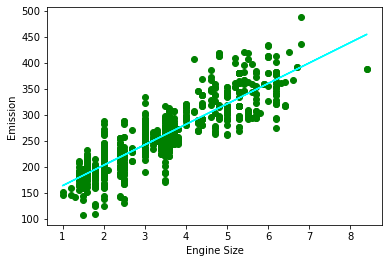

In [152]:
# Plotting the scatter
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c = "green")
# Plotting the regression line
plt.plot(train_x, lgr.coef_[0][0]*train_x + lgr.intercept_[0], c = "cyan")
plt.xlabel("Engine Size")
plt.ylabel("Emission");


## Evaluation
* After train the model with the train data set, prediction can be made on the test data set
* The model would be evaluated to see how well it has learn.
*Evvaluation metrics such as:*

 **Mean Absolute Error**
 
   mean of the absolute value of the errors: mean(absolute(`predicted values` - `actual values`))
    
 **Mean Squared Error**
 
   mean of the squared errors sensitive to large errors: mean(absolute(`predicted values` - `actual values`)** 2) 
    
 **Root Mean Squared**
 
   root of the mean squared errors: sqrt(mean(absolute(`predicted values` - `actual values`)**2))
    
 **R-Squared**
 
   gives the performance of the regression model.

In [153]:
from sklearn.metrics import r2_score

test_x =np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
y_pred = lgr.predict(test_x)

MAE = np.mean(np.absolute(y_pred - test_y))
MSE = np.mean(np.absolute(y_pred - test_y)**2)
r2score = r2_score(test_y, y_pred)

In [154]:
MAE

24.337098836023216

In [155]:
MSE

1019.7544068505123

In [156]:
r2score

0.7412319136367909

### Training and evaluating on the `FUELCOMSUMPTION_COMB`

In [158]:
# create the training set of FUELCONSUMPTION_COMB
train_x = train[["FUELCONSUMPTION_COMB"]]

# crete the testing set of FUELCONSUMPTION_COMB
test_x = test[["FUELCONSUMPTION_COMB"]]


# training the model with training set

lgr.fit(train_x, train_y)

# make prediction on with test set
y_pred1 = lgr.predict(test_x)


# Evaluate the model on the predictions
MAE1 = np.mean(np.absolute(y_pred1 - test_y))
MSE1 = np.mean(np.absolute(y_pred1 - test_y)**2)
r2score1 = r2_score(test_y, y_pred1)


In [159]:
MAE1

20.44815629167673

In [160]:
MSE1

813.4227523037608

In [161]:
r2score1

0.7935896647232684

**`FUELCONSUMPTIONS_COMB` perform relative better compare to `ENGINESIZE`**

# Polynomial Regression

## Objectives
 * Using Scikit-learn to implement polynomial regression
 * Create a model
 * Train the model
 * Test the model
 * Use the model

Sometimes, the trend of data is not linear, and curvy. 
Polynonial regression is used in these case
the relationship between the independent variable x and dependent variable is modeled as an nth degree polynomial in x

In [162]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])


test_x = np.asanyarray(train[["ENGINESIZE"]])
test_y = np.asanyarray(train[["CO2EMISSIONS"]])

# Polynomial of degree 2
poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [163]:
lgr.fit(train_x_poly, train_y)

coefficient = lgr.coef_
intercepts = lgr.intercept_

In [164]:
coefficient

array([[ 0.        , 49.04843354, -1.29309129]])

In [165]:
intercepts

array([109.40671236])

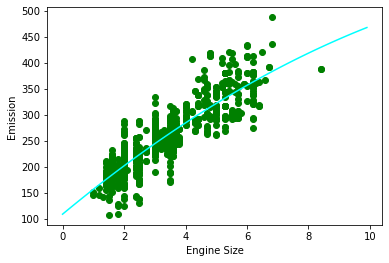

In [166]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c = "green")
XX = np.arange(0.0, 10, 0.1)
yy = lgr.intercept_[0] + lgr.coef_[0][1]*XX + lgr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, c = "cyan")
plt.xlabel("Engine Size")
plt.ylabel("Emission");

In [167]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
y_pred = lgr.predict(test_x_poly)

MAE = np.mean(np.absolute(y_pred - test_y))
MSE = np.mean(np.absolute(y_pred - test_y)**2)
r2score = r2_score(test_y, y_pred)

In [168]:
MAE

23.158239531023376

In [169]:
MSE

921.8165417427537

In [170]:
r2score

0.7709583040482053

In [171]:
# Polynomial of degree 3
poly2 = PolynomialFeatures(degree = 3)

# transform the train_x in poly_train_x
poly_x_train2 = poly2.fit_transform(train_x)

# now the poly_x_train can be linearly fitted
lgr.fit(poly_x_train2, train_y)

LinearRegression()

In [172]:
poly_x_train2

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [173]:
coefficient = lgr.coef_
intercept = lgr.intercept_

In [174]:
coefficient

array([[ 0.        , 23.63406664,  5.66559317, -0.57404886]])

In [175]:
intercept

array([136.58250477])

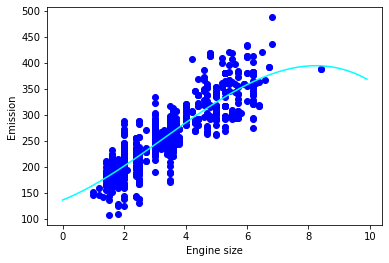

In [176]:
# With intercept and coefficient, plot the polynomial line
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c = "blue")
X = np.arange(0.0, 10, 0.1)
Y = lgr.intercept_[0] +lgr.coef_[0][1]*X + lgr.coef_[0][2]*np.power(X, 2) + lgr.coef_[0][3]*np.power(X, 3)
plt.plot(X, Y, c = "cyan")
plt.xlabel("Engine size")
plt.ylabel("Emission");

In [177]:
from sklearn.metrics import r2_score

test_x_poly2 = poly2.transform(test_x)
y_pred = lgr.predict(test_x_poly2)

MAE = np.mean(np.absolute(y_pred - test_y))
MSE = np.mean(np.absolute(y_pred - test_y)**2)
r2score = r2_score(test_y, y_pred)

In [178]:
MAE

23.0571088228187

In [179]:
MSE

915.9713512314626

In [180]:
r2score

0.7724106454710836

# Non Linear Regression Analysis

## Objectives


*   Differentiate between linear and non-linear regression
*   Use non-linear regression model in Python

Linear regession cannot be used for all datasets
it models a linear relationship between dependent variable `y` and independent varaible `x`

* for example `y = 2x + 3`


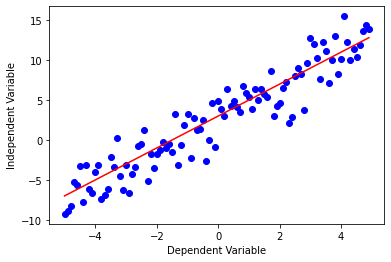

In [181]:
x = np.arange(-5.0, 5, 0.1)
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size =x.size)
ydata = y + y_noise
plt.plot(x, ydata, "bo")
plt.plot(x, y, "r")
plt.xlabel("Dependent Variable")
plt.ylabel("Independent Variable");


Non-linear regression is used to model non-linear relationship between the independent variable `x` and the dependent vaariable `y`

* examples:
$$ y = a x^3 + b x^2 + c x + d \ $$

$$  y = \log(x) \$$


$$ y = \log(a x^3 + b x^2 + c x + d)$$

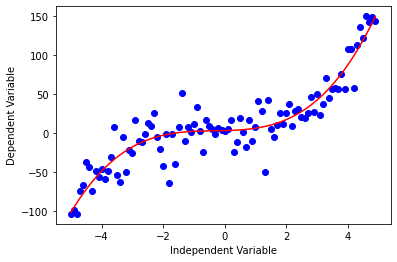

In [182]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable');

**Quadratic functions**
$$ y = x^2 $$

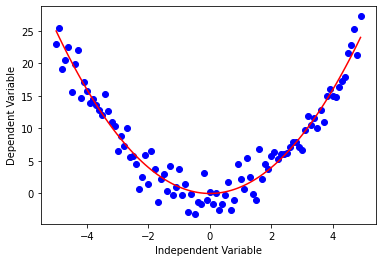

In [183]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable');

**Exponential**

$$ y = a + b c^x $$

where b ≠ 0, c ≠ 1 and x is any real number. the base c is a constant and x is a variable

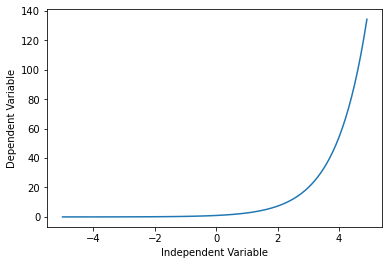

In [184]:
X = np.arange(-5.0, 5.0, 0.1)



Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

**Logarithmic**
$$ y = log(x) $$

$$ y = log(X) $$  **X** a polynomial representation of the x values


C:\Users\ahiab\AppData\Local\Temp\ipykernel_13424\2233958358.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


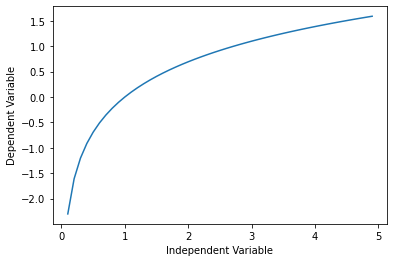

In [185]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

**Sigmoidal / Logistic**

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

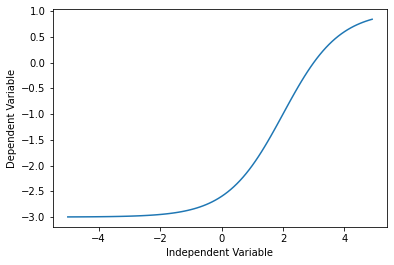

In [186]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable');

In [187]:
df1 = pd.read_csv("china_gdp.csv")
df1.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


**Visualising the dataset**

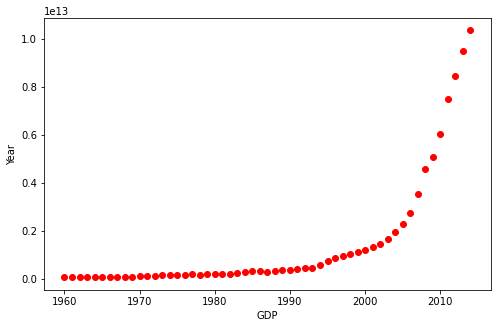

In [188]:
plt.figure(figsize = (8, 5))
x_data, y_data = (df1["Year"].values, df1["Value"].values)
plt.plot(x_data, y_data, "ro")
plt.xlabel("GDP")
plt.ylabel("Year");

**Chosing a model**
from the plot, we determine that logistic function could be a good approximation. The plot :
* started with a slow growth
* increasing growth in the middle

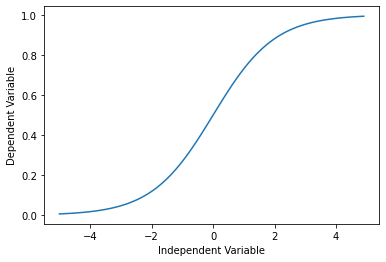

In [189]:
# simoidal / logistic
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable');

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.

**Building The Model**

In [190]:
def sigmoid(x,Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x-Beta_2)))
    return y

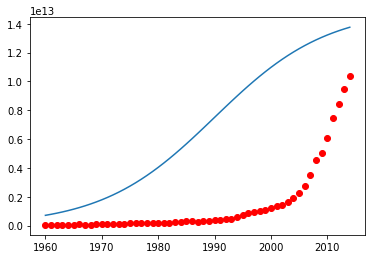

In [191]:
# sample sigmoid line that might fit with the data

beta_1 = 0.10
beta_2 = 1990.0

# logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

# Plotting the prediction against the datapoints
plt.plot(x_data, Y_pred*15000000000000)
plt.plot(x_data, y_data, "ro");

finding the best parameters for the model

In [192]:
# Normalising the dat
xdata = x_data / max(x_data)
ydata = y_data/max(y_data)

**Curve_fit**
* Uses the nno-linear least squares to fit our sigmoid function, to the data
* This optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.
* popt are our optimized parameters.

In [193]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#printing out the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


Plot the resulting regression model

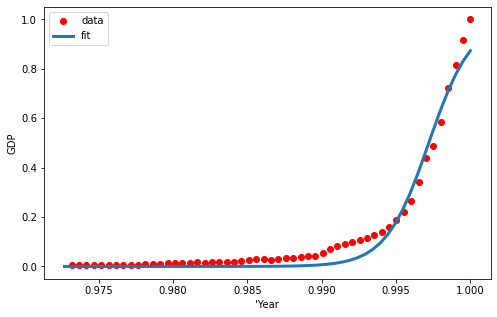

In [194]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize = (8, 5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, "ro", label = "data")
plt.plot(x, y, linewidth = 3.0, label = "fit")
plt.legend(loc = "best")
plt.ylabel("GDP")
plt.xlabel("'Year");

 calculate the accuracy



In [197]:
# split data into train and test set
msk = np.random.rand(len(df1)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov =curve_fit(sigmoid, train_x, train_y)


# predict using test set
y_hat = sigmoid(test_x, *popt)


# evaluation
MAE = np.mean(np.absolute(y_hat - test_y))
MSE = np.mean(np.absolute(y_hat - test_y)**2)

from sklearn.metrics import r2_score
r2score3 = r2_score(test_y, y_hat)

In [198]:
MAE

0.024208896569214187

In [199]:
MSE

0.0011977064287619695

In [200]:
r2score3

0.9748076114672046

# Multiple Linear Regression

## Objectives
 * Using Scikit-learn to implement Multiple Linear Regression
 * Create a model
 * Train the model
 * Test the model
 * Use the model

Using `FUelConsumption.csv` dataset used in Linear Regressionm

In [212]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [228]:
some_features.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [229]:
# split data into train and test
msk = np.random.rand(len(df)) < 0.8
train = some_features[msk]
test = some_features[~msk]

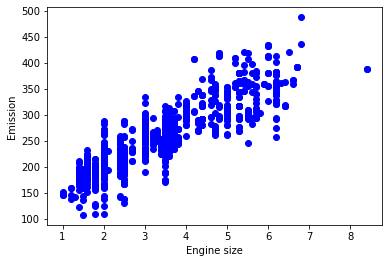

In [230]:
plt.scatter(some_features.ENGINESIZE, some_features.CO2EMISSIONS, c = "blue")
plt.xlabel("Engine size")
plt.ylabel("Emission");

**Multiple Linear Regression**

In [231]:
from sklearn.linear_model import LinearRegression

rgr = LinearRegression()
x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y = np.asanyarray(train[["CO2EMISSIONS"]])
rgr.fit(x, y)

coefficient = rgr.coef_
intercept = rgr.intercept_

In [232]:
coefficient

array([[ 9.8990524 ,  7.51635428, 10.13629234]])

In [233]:
intercept

array([62.57519998])

In [234]:
y_hat = rgr.predict(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
x = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y = np.asanyarray(test[["CO2EMISSIONS"]])

MSE = np.mean((y_hat - y)**2)
variance = rgr.score(x, y)

C:\Users\ahiab\OneDrive\Desktop\HomeLLc_project\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [235]:
MSE

564.1550820240757

In [236]:
variance

0.8612181413603568


$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
The best possible score is 1.0, the lower values are worse.

In [238]:
new_features = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_CITY", "CO2EMISSIONS"]]

In [239]:
new_features.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,6.7,9.9,196
1,2.4,4,7.7,11.2,221
2,1.5,4,5.8,6.0,136
3,3.5,6,9.1,12.7,255
4,3.5,6,8.7,12.1,244


In [240]:
# split the data
msk1 = np.random.rand(len(df)) < 0.8
train = new_features[msk1]
test = new_features[~msk1]

In [245]:
from sklearn.linear_model import LinearRegression
rgr1 = LinearRegression()
train_x = train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_CITY"]]
train_y = train[["CO2EMISSIONS"]]
rgr1.fit(train_x, train_y)

# make predicion and evaluate the model
y_hat1 = rgr1.predict(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_CITY"]])
test_x = test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_CITY"]]
test_y = test[["CO2EMISSIONS"]]


MSE1 = np.mean((y_hat1 - test_y)**2)

variance = rgr1.score(test_x, test_y)

C:\Users\ahiab\OneDrive\Desktop\HomeLLc_project\env\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [246]:
MSE1

CO2EMISSIONS    542.259263
dtype: float64

In [243]:
variance

0.8424483356948419

In [247]:
regr = LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[11.03270793  6.80551644  6.99186157  2.13921147]]
Residual sum of squares: 542.26
Variance score: 0.84


C:\Users\ahiab\OneDrive\Desktop\HomeLLc_project\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
